### Density-based spatial clustering of applications with noise (DBSCAN)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from collections import defaultdict

from IPython.display import display
from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
from scipy.spatial import distance
import queue

# make matplotlib plot inline (Only in Ipython).
%matplotlib inline

### Drawback of K-means: Cannot handle non-spherical data

> *K-means* clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with **the nearest mean**. (Wikipedia) 

Since the concentric circles would have the approximately same mean, so k-means is not suitable to separate them.

Let's generate non-spherical data and plot the ground truths of clusters.

K-means also cannot take the mean of categorical data. Cannot handled one-hot encoded vectors.

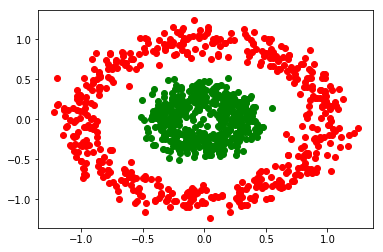

In [3]:
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'go')

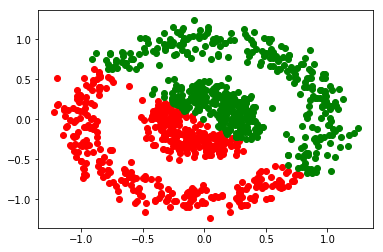

In [4]:
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Plot the predictions.
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

## DBSCAN: Density-Based Spatial Clustering of Applications with Noise

### Parameters
- $Eps$: Maximum radius of the neighborhood.
- $MinPts$: Minimum number of points in the Eps-neighborhood of a point.

### Terms
- The Eps-neighborhood of a point $q$－$N_{Eps}$: A point $p \in N_{Eps}(q)$ if $D(p,q) \leq Eps$. (Point inside the circle).
- Outlier: Not in a cluster.
- Core point: $\left\vert N_{Eps}(q) \right\vert \geq MinPts$ (dense neighborhood).
- Border point: In cluster but neighborhood is not dense.

<div style="text-align:center"><img width="300px" src="img/core-border-point.png"/></div>


- Directly density-reachable: A point $p$ is **directly density-reachable** from a point $q$ w.r.t $Eps$ and $MinPts$ if:
    - $p \in N_{Eps}(q)$, and $q$ is a **core point**.
    - $p$ **doesn't** need to be a core point.

<div style="text-align:center"><img width="250px" src="img/directly-density-reachable.png"/></div>

- Density-reachable: A point $p$ is **density-reachable** from a point $q$ w.r.t. $Eps$ and $MinPts$ if there is a chain of points $p_1, \dots, p_n,\ p_1 = q,\ p_n = p$ such that $p_{i+1}$ is directly density-reachable from $p_i$.

<div style="text-align:center"><img width="150px" src="img/density-reachable.png"/></div>

### The Algorithm
1. Randomly choose a point $p$.
2. Retrieve all points density-reachable from $p$ w.r.t. $Eps$ and $MinPts$.
3. If $p$ is a core point, a cluster is formed.
4. If $p$ is a border point, no points are density-reachable from $p$, then visit the next point.
5. Repeat the process until all the data points have been processed.

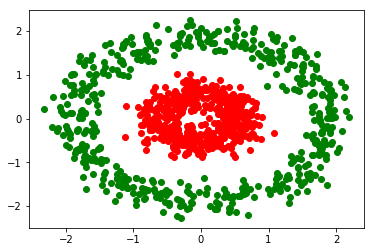

In [5]:
# Generate non-spherical data.
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

# Perform DBSCAN on the data
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')


### Please complete the following tasks:
- Implement *DBSCAN* algorithm yourself.
- Apply the implemented *DBSCAN* algorithm on the given training data.
- Plot the clusters.

In [42]:
eps = 0.3
minPts = 5

labels = np.zeros(X.shape[0])   # -1:Noise Point, 0: Unvisited 
cluster_points = np.zeros(X.shape[0])  # Tracks number of clusters and the points contained in them

curr_cluster = 0

for idx, point in enumerate(X):
  
  if labels[idx] == 0:  # Point is already visited
    continue
    
  neighbours = get_neighbour_list(idx, eps)
  
  if (len(neighbours) < minPts):
    labels[idx] = -1    # Label point as noise and continue
    continue
  
  labels[idx] = curr_cluster   # Label point as core and assign to the cluster
  cluster_queue = queue.Queue()
  cluster_queue.put(idx)
    
  if not cluster_queue.empty():
    queue_point = queue.get()
    
    if labels[queue_point] == -1:         # Point is labelled as noise
      labels[queue_point] = curr_cluster
    
    else if labels[queue_point] != 0:     # Point already belongs to another cluster
      continue                            
      
    labels[queue_point] = curr_cluster
    qpoint_neighbours = get_neighbour_list(queue_point)
    
    if len(qpoint_neighbours) >= minPts:
      for neigh in qpoint_neighbours
        queue.put(neigh)

In [37]:
def get_neighbour_list(point_idx, eps):
  neighbours = []
  
  for idx, point in enumerate(X):
    if idx == point_idx: # Skip same datapoint when considering neighbours
      continue
    
    if distance.euclidean(X[point_idx], point) <= eps:
      neighbours.append(idx)
    
  return neighbours

In [ ]:
a = queue.Queue()
items = [1, 2, 3]

In [ ]:
a = queue.Queue()
items = [1, 2, 3]

q.extend(items)